In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob,os # 指定したパスのディレクトリ中のファイル一覧を出力
%matplotlib inline

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 5 #TODO; enter the number of inside corners in y

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
print(images)

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']


In [2]:
# two empty arrays to hold these points, object points and image points.
objpoints = []
imgpoints = []

# Prepare objects points, like (0,0,0,), (1,0,0), (2,0, 0) .... (9, 5, ,0)
objp = np.zeros((9*5, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:5].T.reshape(-1,2) # x, y coordinates

for frame in images:
    img = cv2.imread(frame)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 注：mpimg.imread（）を使用してイメージを読み込んでいる場合、これはRGBイメージで読み込まれ、
    # cv2.COLOR_RGB2GRAYを使用してグレースケールに変換する必要がありますが、
    # cv2.imread（）またはglob APIを使用している場合 このビデオの例では、これはBGRイメージで読み込まれ、
    # cv2.COLOR_BGR2GRAYを使用してグレースケールに変換する必要があります。 
    # 後でこのレッスンで色変換について学びますが、独自のコードを記述してコード例を見るときは、
    # この点を念頭に置いてください。
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # If found, draw corners
    if ret == True:
        # Darw and display the corners
        imgpoints.append(corners) # オブジェクトをリストの最後に追加する方法です。
        objpoints.append(objp)    # リスト型で用意されている「append」メソッドを使います。
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

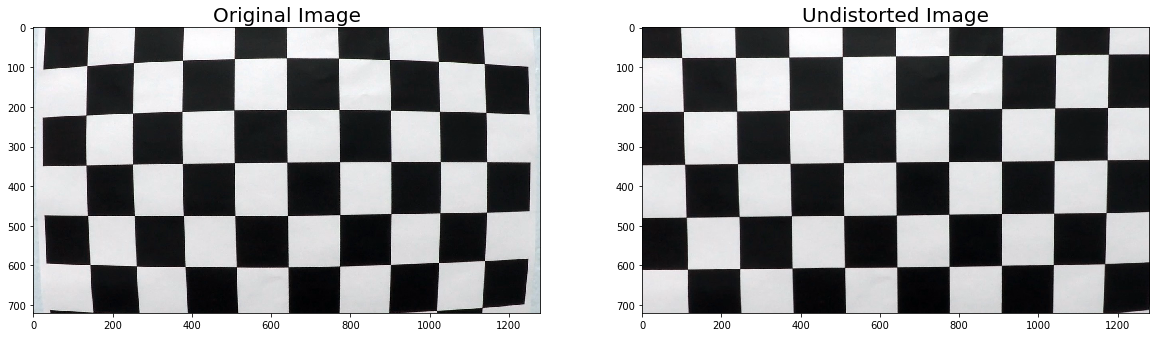

In [3]:
image = cv2.imread('camera_cal/calibration1.jpg')
img_size = (image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(image, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)

pickle.dump( data, open( "camera_calibration.pkl", "wb" ) )

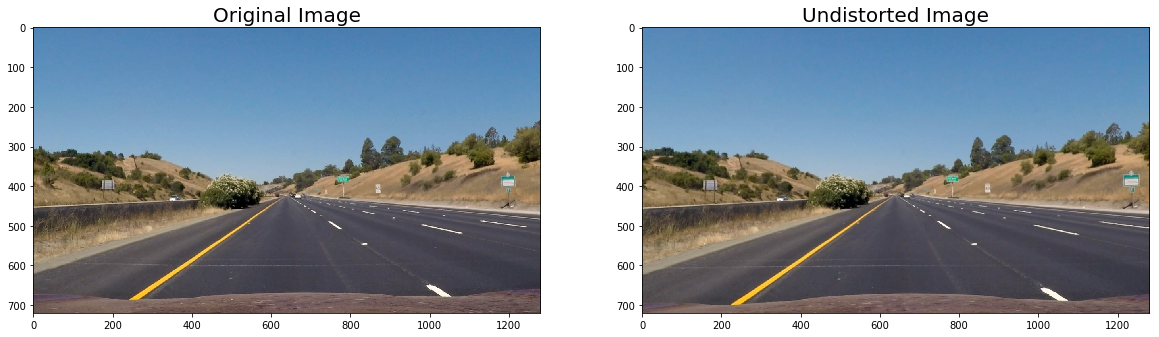

In [4]:
image =cv2.imread("test_images/straight_lines1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_size=(image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(image, mtx, dist, None, mtx)
dst_bgr = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite("output_images/straight_lines1.jpg",dst_bgr)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)

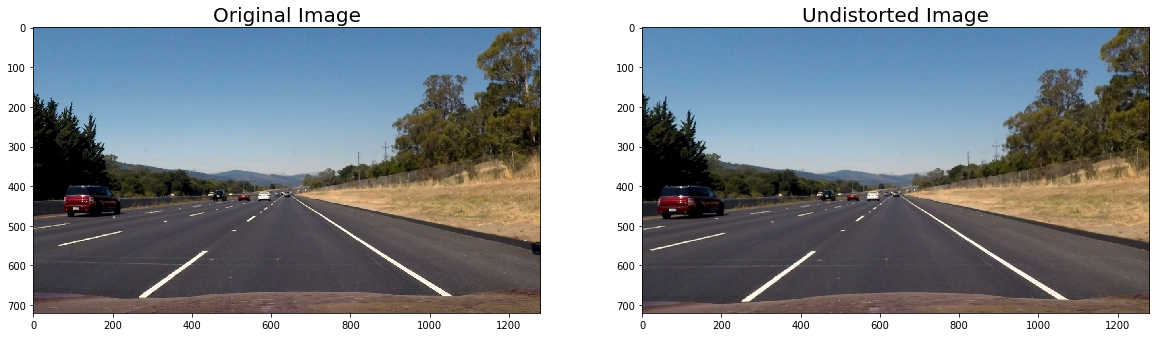

In [5]:
image =cv2.imread("test_images/straight_lines2.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_size=(image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(image, mtx, dist, None, mtx)
dst_bgr = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite("output_images/straight_lines2.jpg",dst_bgr)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)